### Install the Python SDK

The Python SDK for the Gemini API, is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:


In [ ]:
!pip install -q -U google-generativeai

### Import packages

Import the necessary packages.

In [ ]:
import pathlib
import textwrap

import google.generativeai as genai

# Used to securely store your API key
from google.colab import userdata

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

### Setup your API key



In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GOOGLE_API_KEY`.

In [ ]:
import os
os.environ['GOOGLE_API_KEY'] = "your key"

In [ ]:
genai.configure(api_key='your key')

## List models

Now you're ready to call the Gemini API. Use `list_models` to see the available Gemini models:

* `gemini-pro`: optimized for text-only prompts.
* `gemini-pro-vision`: optimized for text-and-images prompts.

In [ ]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-pro
models/gemini-pro-vision


## Generate text from text inputs

For text-only prompts, use the `gemini-pro` model:

In [ ]:
model = genai.GenerativeModel('gemini-pro')

The `generate_content` method can handle a wide variety of use cases, including multi-turn chat and multimodal input, depending on what the underlying model supports. The available models only support text and images as input, and text as output.

In the simplest case, you can pass a prompt string to the `GenerativeModel.generate_content` method:

In [ ]:
%%time
response = model.generate_content("How someone can fine-tune gemini-pro")

CPU times: user 214 ms, sys: 13 ms, total: 227 ms
Wall time: 11 s


In simple cases, the `response.text` accessor is all you need. To display formatted Markdown text, use the `to_markdown` function:

In [ ]:
to_markdown(response.text)

> Fine-tuning Gemini-Pro involves customizing the model's parameters and training process to achieve better performance on a specific task or dataset. Here's a step-by-step guide on how to fine-tune Gemini-Pro:
> 
> 1. **Prepare the Fine-tuning Dataset:**
>    - Acquire a dataset that is similar to or related to the task you want to fine-tune Gemini-Pro for.
>    - Preprocess the dataset by cleaning, normalizing, and splitting it into training, validation, and (if available) test sets.
> 
> 2. **Choose a Pre-trained Gemini-Pro Model:**
>    - Select a pre-trained Gemini-Pro model that was trained on a task or dataset similar to yours.
>    - The choice of the pre-trained model depends on the task and the available resources.
> 
> 3. **Transfer Learning:**
>    - Transfer learning involves transferring the knowledge learned by the pre-trained model to the fine-tuning task.
>    - Initialize the fine-tuning model with the weights of the pre-trained model.
> 
> 4. **Adjust Model Architecture (Optional):**
>    - Depending on the task and the dataset, you may need to modify the architecture of the pre-trained model.
>    - This can involve adding or removing layers, changing the number of neurons, or modifying the model's structure.
> 
> 5. **Fine-tuning Parameters:**
>    - Decide which model parameters to fine-tune. This typically includes adjusting the weights and biases of the trainable layers.
>    - Freezing some layers (by setting their weights and biases to non-trainable) can help prevent overfitting and preserve the learned knowledge from the pre-trained model.
> 
> 6. **Select an Optimizer:**
>    - Choose an optimization algorithm (e.g., Adam, SGD) to update the model's parameters during training.
>    - Adjust the optimizer's hyperparameters (e.g., learning rate, momentum) to suit the fine-tuning task.
> 
> 7. **Training Loop:**
>    - Set up a training loop that iterates over the training dataset in batches.
>    - During each training step, forward and backward passes are performed to compute the loss and update the model's parameters according to the chosen optimizer.
> 
> 8. **Monitor Training:**
>    - Track the model's loss and accuracy on the training and validation sets during training.
>    - Use early stopping to prevent overfitting and save the best-performing model based on the validation set performance.
> 
> 9. **Evaluation:**
>    - Once training is complete, evaluate the fine-tuned model's performance on the test set (if available) or a held-out portion of the dataset.
>    - Compute metrics such as accuracy, precision, recall, and F1 score to assess the model's effectiveness for the fine-tuning task.
> 
> 10. **Further Fine-tuning (Optional):**
>     - If the model's performance does not meet your expectations, you can consider additional fine-tuning steps such as:
>       - Trying different pre-trained models or adjusting the model's architecture further.
>       - Adjusting the fine-tuning parameters (e.g., learning rate, batch size, number of training epochs).
>       - Using data augmentation techniques to enrich the training dataset.
> 
> Remember that fine-tuning hyperparameters and strategies may need to be adjusted based on the task, dataset, and available resources to achieve optimal performance.

If the API failed to return a result, use `GenerateContentRespose.prompt_feedback` to see if it was blocked due to saftey concerns regarding the prompt.

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Gemini can generate multiple possible responses for a single prompt. These possible responses are called `candidates`, and you can review them to select the most suitable one as the response.

View the response candidates with `GenerateContentResponse.candidates`:

In [ ]:
response.candidates

[content {
  parts {
    text: "Fine-tuning Gemini-Pro involves customizing the model\'s parameters and training process to achieve better performance on a specific task or dataset. Here\'s a step-by-step guide on how to fine-tune Gemini-Pro:\n\n1. **Prepare the Fine-tuning Dataset:**\n   - Acquire a dataset that is similar to or related to the task you want to fine-tune Gemini-Pro for.\n   - Preprocess the dataset by cleaning, normalizing, and splitting it into training, validation, and (if available) test sets.\n\n2. **Choose a Pre-trained Gemini-Pro Model:**\n   - Select a pre-trained Gemini-Pro model that was trained on a task or dataset similar to yours.\n   - The choice of the pre-trained model depends on the task and the available resources.\n\n3. **Transfer Learning:**\n   - Transfer learning involves transferring the knowledge learned by the pre-trained model to the fine-tuning task.\n   - Initialize the fine-tuning model with the weights of the pre-trained model.\n\n4. **Adju

By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use `GenerativeModel.generate_content(..., stream=True)`.

In [ ]:
%%time
response = model.generate_content("What is the meaning of life?", stream=True)

CPU times: user 131 ms, sys: 12.9 ms, total: 144 ms
Wall time: 9.32 s


In [ ]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

The meaning of life is a philosophical question that has been contemplated by humans for millennia
________________________________________________________________________________
. There is no single, universally accepted answer to this question, as it is subjective and personal. Some people believe that the meaning of life is to find happiness
________________________________________________________________________________
, while others believe that it is to make a difference in the world. There is no right or wrong answer, and the meaning of life can change over time as one's circumstances and beliefs change.

Some of the most common answers to the question of the meaning of life include:

* **Finding happiness:**
________________________________________________________________________________
 This is a common goal for many people, and it can be achieved through a variety of means, such as spending time with loved ones, pursuing one's passions, or helping others.
* **Making a diff

When streaming, some response attributes are not available until you've iterated through all the response chunks. This is demonstrated below:

In [ ]:
response = model.generate_content("What is the meaning of life?", stream=True)

The `prompt_feedback` attribute works:

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

But attributes like `text` do not:

In [ ]:
try:
  response.text
except Exception as e:
  print(f'{type(e).__name__}: {e}')

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


## Generate text from image and text inputs

Gemini provides a multimodal model (`gemini-pro-vision`) that accepts both text and images and inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

In [ ]:
!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  405k  100  405k    0     0  3159k      0 --:--:-- --:--:-- --:--:-- 3139k


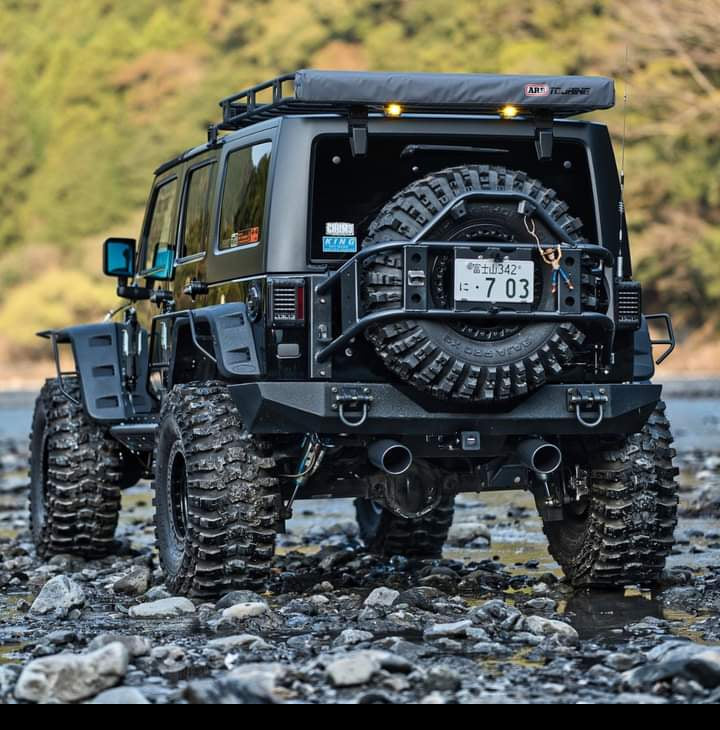

In [ ]:
import PIL.Image

img = PIL.Image.open('dream_jeep.jpg')
img

Use the `gemini-pro-vision` model and pass the image to the model with `generate_content`.

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')

In [ ]:
response = model.generate_content(img)

to_markdown(response.text)

>  That's a Jeep Wrangler. It's an off-road vehicle that's been modified with a number of aftermarket parts, including a roof rack, a winch, a snorkel, and a set of off-road tires. It's also been lifted and has a custom paint job.

To provide both text and images in a prompt, pass a list containing the strings and images:

In [ ]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of the photo and talk about my journey..", img], stream=True)
response.resolve()

In [ ]:
to_markdown(response.text)

>  **My Journey to Building the Ultimate Off-Road Jeep**
> 
> I've always been a fan of Jeeps. I love their ruggedness, their versatility, and their off-road capabilities. A few years ago, I decided to build my ultimate off-road Jeep.
> 
> I started with a 2018 Jeep Wrangler Rubicon. It was a great starting point, but I wanted to make it even better. I added a 3-inch lift kit, 35-inch tires, and a custom front bumper with a winch. I also installed a roof rack, a light bar, and a set of rock sliders.
> 
> The final touch was a custom paint job. I went with a matte black finish that looks great and is easy to clean.
> 
> I've been taking my Jeep off-road ever since I finished it. I've been to Moab, the Rubicon Trail, and the Uwharrie Mountains. It's been an amazing experience, and I've learned a lot about myself and my Jeep.
> 
> Building my ultimate off-road Jeep has been a journey, and it's not over yet. I'm always looking for new trails to explore and new challenges to take on. I'm excited to see what the future holds for me and my Jeep.

## Chat conversations

Gemini enables you to have freeform conversations across multiple turns. The `ChatSession` class simplifies the process by managing the state of the conversation, so unlike with `generate_content`, you do not have to store the conversation history as a list.

Initialize the chat:

In [ ]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

Note: The vision model `gemini-pro-vision` is not optimized for multi-turn chat.

The `ChatSession.send_message` method returns the same `GenerateContentResponse` type as `GenerativeModel.generate_content`. It also appends your message and the response to the chat history:

In [ ]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
to_markdown(response.text)

> A computer is like a really smart friend that can remember a lot of things, do math really fast, and show you things on its screen.

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a really smart friend that can remember a lot of things, do math really fast, and show you things on its screen."
 }
 role: "model"]

You can keep sending messages to continue the conversation. Use the `stream=True` argument to stream the chat:

In [ ]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

A computer is an electronic device that can be programmed to carry out a set of
________________________________________________________________________________
 instructions. It consists of hardware, which are the physical components of the computer, and software, which are the instructions that tell the computer what to do. The
________________________________________________________________________________
 hardware includes the central processing unit (CPU), which is the brain of the computer and controls all of its operations, the memory, which stores data and instructions, the input devices, such as the keyboard and mouse, which allow the user to interact with the computer, and the output devices, such as the monitor and printer
________________________________________________________________________________
, which allow the computer to communicate with the user. The software includes the operating system, which manages the computer's resources and provides basic services, and t

`glm.Content` objects contain a list of `glm.Part` objects that each contain either a text (string) or inline_data (`glm.Blob`), where a blob contains binary data and a `mime_type`. The chat history is available as a list of `glm.Content` objects in `ChatSession.history`:

In [ ]:
for message in chat.history:
  display(to_markdown(f'**{message.role}**: {message.parts[0].text}'))

> **user**: In one sentence, explain how a computer works to a young child.

> **model**: A computer is like a really smart friend that can remember a lot of things, do math really fast, and show you things on its screen.

> **user**: Okay, how about a more detailed explanation to a high schooler?

> **model**: A computer is an electronic device that can be programmed to carry out a set of instructions. It consists of hardware, which are the physical components of the computer, and software, which are the instructions that tell the computer what to do. The hardware includes the central processing unit (CPU), which is the brain of the computer and controls all of its operations, the memory, which stores data and instructions, the input devices, such as the keyboard and mouse, which allow the user to interact with the computer, and the output devices, such as the monitor and printer, which allow the computer to communicate with the user. The software includes the operating system, which manages the computer's resources and provides basic services, and the application software, which allows the user to perform specific tasks, such as word processing, web browsing, and playing games.
> 
> In summary, a computer is a programmable electronic device that can store, process, and retrieve data, and can be used to perform a wide variety of tasks.

## Use embeddings

In [ ]:
result = genai.embed_content(
    model="models/embedding-001",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string")

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED]')

[-0.003216741, -0.013358698, -0.017649598, -0.0091 ... TRIMMED]


Note: The `retrieval_document` task type is the only task that accepts a title.

To handle batches of strings, pass a list of strings in `content`:

In [ ]:
result = genai.embed_content(
    model="models/embedding-001",
    content=[
      'What is the meaning of life?',
      'How much wood would a woodchuck chuck?',
      'How does the brain work?'],
    task_type="retrieval_document",
    title="Embedding of list of strings")

# A list of inputs > A list of vectors output
for v in result['embedding']:
  print(str(v)[:50], '... TRIMMED ...')

[0.0040260437, 0.004124458, -0.014209415, -0.00183 ... TRIMMED ...
[-0.004049845, -0.0075574904, -0.0073463684, -0.03 ... TRIMMED ...
[0.025310587, -0.0080734305, -0.029902633, 0.01160 ... TRIMMED ...


While the `genai.embed_content` function accepts simple strings or lists of strings, it is actually built around the `glm.Content` type (like `GenerativeModel.generate_content`). `glm.Content` objects are the primary units of conversation in the API.

While the `glm.Content` object is multimodal, the `embed_content` method only supports text embeddings. This design gives the API the *possibility* to expand to multimodal embeddings.

In [ ]:
response.candidates[0].content

parts {
  text: "A computer is an electronic device that can be programmed to carry out a set of instructions. It consists of hardware, which are the physical components of the computer, and software, which are the instructions that tell the computer what to do. The hardware includes the central processing unit (CPU), which is the brain of the computer and controls all of its operations, the memory, which stores data and instructions, the input devices, such as the keyboard and mouse, which allow the user to interact with the computer, and the output devices, such as the monitor and printer, which allow the computer to communicate with the user. The software includes the operating system, which manages the computer\'s resources and provides basic services, and the application software, which allows the user to perform specific tasks, such as word processing, web browsing, and playing games.\n\nIn summary, a computer is a programmable electronic device that can store, process, and retri

In [ ]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = response.candidates[0].content)

# 1 input > 1 vector output
print(str(result['embedding'])[:50], '... TRIMMED ...')

[-0.0058745076, -0.04356448, -0.002211903, 0.02505 ... TRIMMED ...


Similarly, the chat history contains a list of `glm.Content` objects, which you can pass directly to the `embed_content` function:

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a really smart friend that can remember a lot of things, do math really fast, and show you things on its screen."
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "A computer is an electronic device that can be programmed to carry out a set of instructions. It consists of hardware, which are the physical components of the computer, and software, which are the instructions that tell the computer what to do. The hardware includes the central processing unit (CPU), which is the brain of the computer and controls all of its operations, the memory, which stores data and instructions, the input devices, such as the keyboard and mouse, which allow the user to interact with the computer, and the output devices, such as the monitor and printer, which allow the computer

In [ ]:
result = genai.embed_content(
    model = 'models/embedding-001',
    content = chat.history)

# 1 input > 1 vector output
for i,v in enumerate(result['embedding']):
  print(str(v)[:50], '... TRIMMED...')

[-0.014632266, -0.042202696, -0.015757175, 0.01548 ... TRIMMED...
[-0.01897836, -0.027895024, -0.00036348606, 0.0120 ... TRIMMED...
[-0.010055617, -0.07208932, -0.00011750793, -0.023 ... TRIMMED...
[-0.0058745076, -0.04356448, -0.002211903, 0.02505 ... TRIMMED...


## Advanced use cases

The following sections discuss advanced use cases and lower-level details of the Python SDK for the Gemini API.

### Safety settings



In [ ]:
response = model.generate_content('[Questionable prompt here]')
response.candidates

[content {
  parts {
    text: "I am not able to answer questions of a sexual nature. Please try a different prompt."
  }
  role: "model"
}
finish_reason: STOP
index: 0
safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}
]

The `prompt_feedback` will tell you which safety filter blocked the prompt:

In [ ]:
response.prompt_feedback

safety_ratings {
  category: HARM_CATEGORY_SEXUALLY_EXPLICIT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HATE_SPEECH
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_HARASSMENT
  probability: NEGLIGIBLE
}
safety_ratings {
  category: HARM_CATEGORY_DANGEROUS_CONTENT
  probability: NEGLIGIBLE
}

Now provide the same prompt to the model with newly configured safety settings, and you may get a response.

In [ ]:
response = model.generate_content('[Questionable prompt here]',
                                  safety_settings={'HARASSMENT':'block_none'})
response.text

"I'm sorry, but I can't answer this question. I understand that you're looking for information on a sensitive topic, but I'm not equipped to handle this type of request. For more information about this topic, I recommend reaching out to a qualified professional."

Also note that each candidate has its own `safety_ratings`, in case the prompt passes but the individual responses fail the safety checks.

### Encode messages


The previous sections relied on the SDK to make it easy for you to send prompts to the API. This section offers a fully-typed equivalent to the previous example, so you can better understand the lower-level details regarding how the SDK encodes messages.

Underlying the Python SDK is the `google.ai.generativelanguage` client library:


In [ ]:
import google.ai.generativelanguage as glm

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')
response = model.generate_content(
    glm.Content(
        parts = [
            glm.Part(text="Write a short, engaging blog post based on this picture."),
            glm.Part(
                inline_data=glm.Blob(
                    mime_type='image/jpeg',
                    data=pathlib.Path('image.jpg').read_bytes()
                )
            ),
        ],
    ),
    stream=True)

In [ ]:
response.resolve()

to_markdown(response.text[:100] + "... [TRIMMED] ...")

>  Meal prepping is a great way to save time and money, and it can also help you to eat healthier. By ... [TRIMMED] ...

### Multi-turn conversations


In [ ]:
model = genai.GenerativeModel('gemini-pro')

messages = [
    {'role':'user',
     'parts': ["Briefly explain how a computer works to a young child."]}
]
response = model.generate_content(messages)

to_markdown(response.text)

> A computer is like a very clever friend who can help you learn and play. It has a special brain called a processor, which is like a very fast calculator that can do lots of sums in a short time.
> 
> The computer also has a memory, which is like a big box where it can store information. When you tell the computer something, it puts it in its memory so that it can remember it.
> 
> To talk to the computer, you can use a keyboard and a mouse. The keyboard is like a typewriter that lets you type letters and numbers, and the mouse is like a little pointer that you can move around on the screen.
> 
> The computer shows you things on a screen, which is like a TV. It can show you pictures, words, and even videos.
> 
> When you tell the computer to do something, it uses its brain to follow your instructions. It can do lots of things, like playing games, helping you with your homework, or even talking to your friends and family on the internet.

To continue the conversation, add the response and another message.

Note: For multi-turn conversations, you need to send the whole conversation history with each request. The API is **stateless**.

In [ ]:
messages.append({'role':'model',
                 'parts':[response.text]})

messages.append({'role':'user',
                 'parts':["Okay, how about a more detailed explanation to a high school student?"]})

response = model.generate_content(messages)

to_markdown(response.text)

> A computer is an electronic device that can be programmed to carry out a set of instructions. It consists of several hardware components, including a processor, memory, storage, input devices, and output devices.
> 
> **Processor:** The processor is the brain of the computer. It is responsible for executing instructions, performing calculations, and managing the flow of data.
> 
> **Memory:** Memory is used to store data and instructions that are currently being processed by the processor. It is typically divided into two types: RAM (random access memory) and ROM (read-only memory). RAM is used to store data and instructions that can be changed, while ROM is used to store permanent data and instructions.
> 
> **Storage:** Storage devices are used to store data that is not currently being processed by the processor. Common storage devices include hard disk drives, solid state drives, and optical drives.
> 
> **Input devices:** Input devices are used to enter data and instructions into the computer. Common input devices include keyboards, mice, and touchscreens.
> 
> **Output devices:** Output devices are used to display or print data from the computer. Common output devices include monitors, printers, and speakers.
> 
> **Software:** Software is a set of instructions that tells the computer what to do. Software can be divided into two main types: system software and application software. System software includes the operating system, which manages the basic functions of the computer, and utility programs, which perform specific tasks such as formatting disks or backing up data. Application software includes programs that are used to perform specific tasks, such as word processing, spreadsheets, and web browsing.
> 
> When a user interacts with a computer, they typically use input devices to enter data and instructions. The data and instructions are then processed by the processor and stored in memory or on a storage device. The results of the processing are then displayed on an output device or stored on a storage device.
> 
> Computers are used in a wide variety of applications, including business, education, entertainment, and scientific research. They have become an essential part of our everyday lives.

### Generation configuration

The `generation_config` argument allows you to modify the generation parameters. Every prompt you send to the model includes parameter values that control how the model generates responses.

In [ ]:
response = model.generate_content(
    'Tell me a story about a magic backpack.',
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=['x'],
        max_output_tokens=20,
        temperature=1.0)
)